In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [50]:
dataset = pd.read_csv(r"C:\Users\NIDHAL\Desktop\Neuer Ordner (8)\data (1).csv")
trainset = pd.read_csv(r"C:\Users\NIDHAL\Desktop\Neuer Ordner (8)\train (1).csv")
validationset = pd.read_csv(r"C:\Users\NIDHAL\Desktop\Neuer Ordner (8)\validation.csv")
testset = pd.read_csv(r"C:\Users\NIDHAL\Desktop\Neuer Ordner (8)\test (1).csv")
#F1, F2, F1/2, Macro

In [51]:
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [52]:
trainset.describe()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,...,3.426000e+03,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.0,3426.000000,3426.000000
mean,3450.276416,0.506435,0.559637,0.554770,0.608186,0.608175,0.998830,0.797207,0.809061,0.303496,...,2.144483e+07,0.623835,0.608185,0.840542,0.280262,0.027630,0.565297,1.0,0.048536,0.030064
std,1975.638584,0.061262,0.065703,0.061740,0.018389,0.018371,0.006723,0.011965,0.014631,0.010280,...,4.158484e+08,0.015073,0.018389,0.011471,0.009919,0.020390,0.012827,0.0,0.053828,0.170789
min,2.000000,0.066933,0.057185,0.054821,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,...,1.015558e-04,0.000000,0.000000,0.344652,0.182790,0.000000,0.000000,1.0,0.000000,0.000000
25%,1739.750000,0.476917,0.536551,0.527705,0.600628,0.600643,0.998971,0.797388,0.809313,0.303470,...,9.166054e-04,0.623637,0.600623,0.840142,0.276879,0.026791,0.565158,1.0,0.024698,0.000000
50%,3461.500000,0.504485,0.561328,0.553857,0.606235,0.606289,0.999026,0.797469,0.809380,0.303526,...,2.119917e-03,0.623877,0.606234,0.841229,0.278779,0.026808,0.565250,1.0,0.033787,0.000000
75%,5176.500000,0.537708,0.590547,0.585618,0.614249,0.614242,0.999100,0.797587,0.809475,0.303588,...,5.277196e-03,0.624188,0.614247,0.842399,0.281352,0.026910,0.565708,1.0,0.054145,0.000000
max,6818.000000,0.971530,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,0.730252,...,9.820000e+09,1.000000,1.000000,1.000000,0.643692,1.000000,0.735958,1.0,1.000000,1.000000


In [53]:
testset.describe()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,...,2.251000e+03,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.0,2251.000000,2251.000000
mean,3364.282985,0.502955,0.556458,0.551477,0.607777,0.607756,0.998516,0.797033,0.808980,0.303850,...,1.954687e+07,0.623833,0.607776,0.840406,0.280515,0.027247,0.565348,1.0,0.046058,0.035984
std,1978.474584,0.059301,0.064999,0.060799,0.016654,0.016637,0.021070,0.016841,0.015311,0.014701,...,3.587710e+08,0.006573,0.016654,0.010643,0.019027,0.004872,0.015792,0.0,0.043373,0.186292
min,8.000000,0.024277,0.000000,0.033514,0.156308,0.156308,0.000000,0.000000,0.084286,0.295983,...,0.000000e+00,0.528279,0.156309,0.442176,0.000000,0.000789,0.172065,1.0,0.008500,0.000000
25%,1616.500000,0.475991,0.533908,0.526929,0.600239,0.600232,0.998966,0.797383,0.809309,0.303464,...,8.839498e-04,0.623628,0.600237,0.840069,0.277008,0.026791,0.565158,1.0,0.024110,0.000000
50%,3347.000000,0.500658,0.558548,0.550511,0.605810,0.605796,0.999020,0.797457,0.809369,0.303526,...,2.041545e-03,0.623874,0.605810,0.841102,0.278855,0.026808,0.565247,1.0,0.033388,0.000000
75%,5080.000000,0.533467,0.586541,0.582365,0.613698,0.613619,0.999088,0.797571,0.809461,0.303582,...,5.318046e-03,0.624137,0.613695,0.842318,0.281615,0.026910,0.565721,1.0,0.051646,0.000000
max,6817.000000,0.755131,0.954536,0.798223,0.665151,0.666023,1.000000,0.809513,0.821053,1.000000,...,9.650000e+09,0.797385,0.665149,0.976180,1.000000,0.174091,1.000000,1.0,0.920638,1.000000


In [54]:
validationset.describe()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,...,1.142000e+03,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.0,1142.000000,1142.000000
mean,3373.312609,0.505798,0.559860,0.554208,0.607569,0.607534,0.999002,0.797447,0.809356,0.303556,...,8.374781e+06,0.624315,0.607568,0.839974,0.280379,0.027855,0.565561,1.0,0.047704,0.031524
std,1926.687142,0.061571,0.066534,0.062654,0.012291,0.012272,0.000271,0.000717,0.000645,0.001083,...,2.715942e+08,0.011622,0.012291,0.025331,0.015513,0.013105,0.007592,0.0,0.050322,0.174805
min,0.000000,0.000000,0.006923,0.000000,0.494249,0.494249,0.994427,0.789248,0.801097,0.293829,...,1.036447e-04,0.557613,0.494250,0.000000,0.133503,0.020713,0.449255,1.0,0.009546,0.000000
25%,1761.500000,0.476417,0.535543,0.527129,0.600284,0.600234,0.998970,0.797386,0.809311,0.303459,...,8.919306e-04,0.623652,0.600284,0.840115,0.277045,0.026791,0.565158,1.0,0.024446,0.000000
50%,3393.500000,0.501267,0.559147,0.550618,0.605576,0.605529,0.999015,0.797458,0.809374,0.303524,...,2.055697e-03,0.623889,0.605572,0.841126,0.278596,0.026812,0.565275,1.0,0.034915,0.000000
75%,5001.250000,0.534320,0.589730,0.582566,0.613172,0.613175,0.999085,0.797566,0.809465,0.303585,...,5.082890e-03,0.624199,0.613169,0.842301,0.281458,0.026929,0.565795,1.0,0.051121,0.000000
max,6807.000000,1.000000,0.984736,0.957760,0.664192,0.664192,0.999557,0.812848,0.822551,0.330080,...,9.170000e+09,0.956387,0.664191,0.885473,0.745352,0.367190,0.736985,1.0,0.881018,1.000000


In [55]:
dataset.info()

# features to drop
 # 2, 3
    
# features to keep
    # Current Ratio
    # Sales / Total Assets
    # Working Capital/Total Assets
    # Earning before interest and taxes / Total Assets
    # Cash Flow/ Debt
    # Equity Market Value /Total Liabilities
    # Cash Flow /Sales
    # Debt / Equity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [56]:
dataset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [57]:
dataset.isnull().sum().sort_values(ascending=False)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 After-tax Net Profit Growth Rate                           0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [58]:
dataset1 = dataset.corr().round(decimals=2)

In [59]:
# there are no NANs in the dataset, although the "flag" features display NANs in the correlation matrix

In [60]:
# Data Cleaning: decided not to eliminate outliers as we dont have deep domain knowledge
# EDA: we selected some of the most important features according to fast research to explore the dataset
# Feature Seleccion: we decided to keep all the features
# Running the model: 
    # for every model we decided to apply SMOTE to balance the data and StandardScaler() as baseline variables
    # Models applied:
        # Logistic Regression
        # Random Forest
        # KNN
        # SVM
        # Nayve Base

In [61]:
dataset.corr()["Bankrupt?"]

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Name: Bankrupt?, Length: 96, dtype: float64

In [62]:
trainset.corr()["Bankrupt?"]

Unnamed: 0                                                 -0.091445
 ROA(C) before interest and depreciation before interest   -0.270092
 ROA(A) before interest and % after tax                    -0.297661
 ROA(B) before interest and depreciation after tax         -0.284588
 Operating Gross Margin                                    -0.091541
                                                              ...   
 Degree of Financial Leverage (DFL)                        -0.007030
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005505
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.065474
Bankrupt?                                                   1.000000
Name: Bankrupt?, Length: 97, dtype: float64

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Pre-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>],
       [<AxesSubplot:title={'center':' Continuous interest rate (after tax)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubp

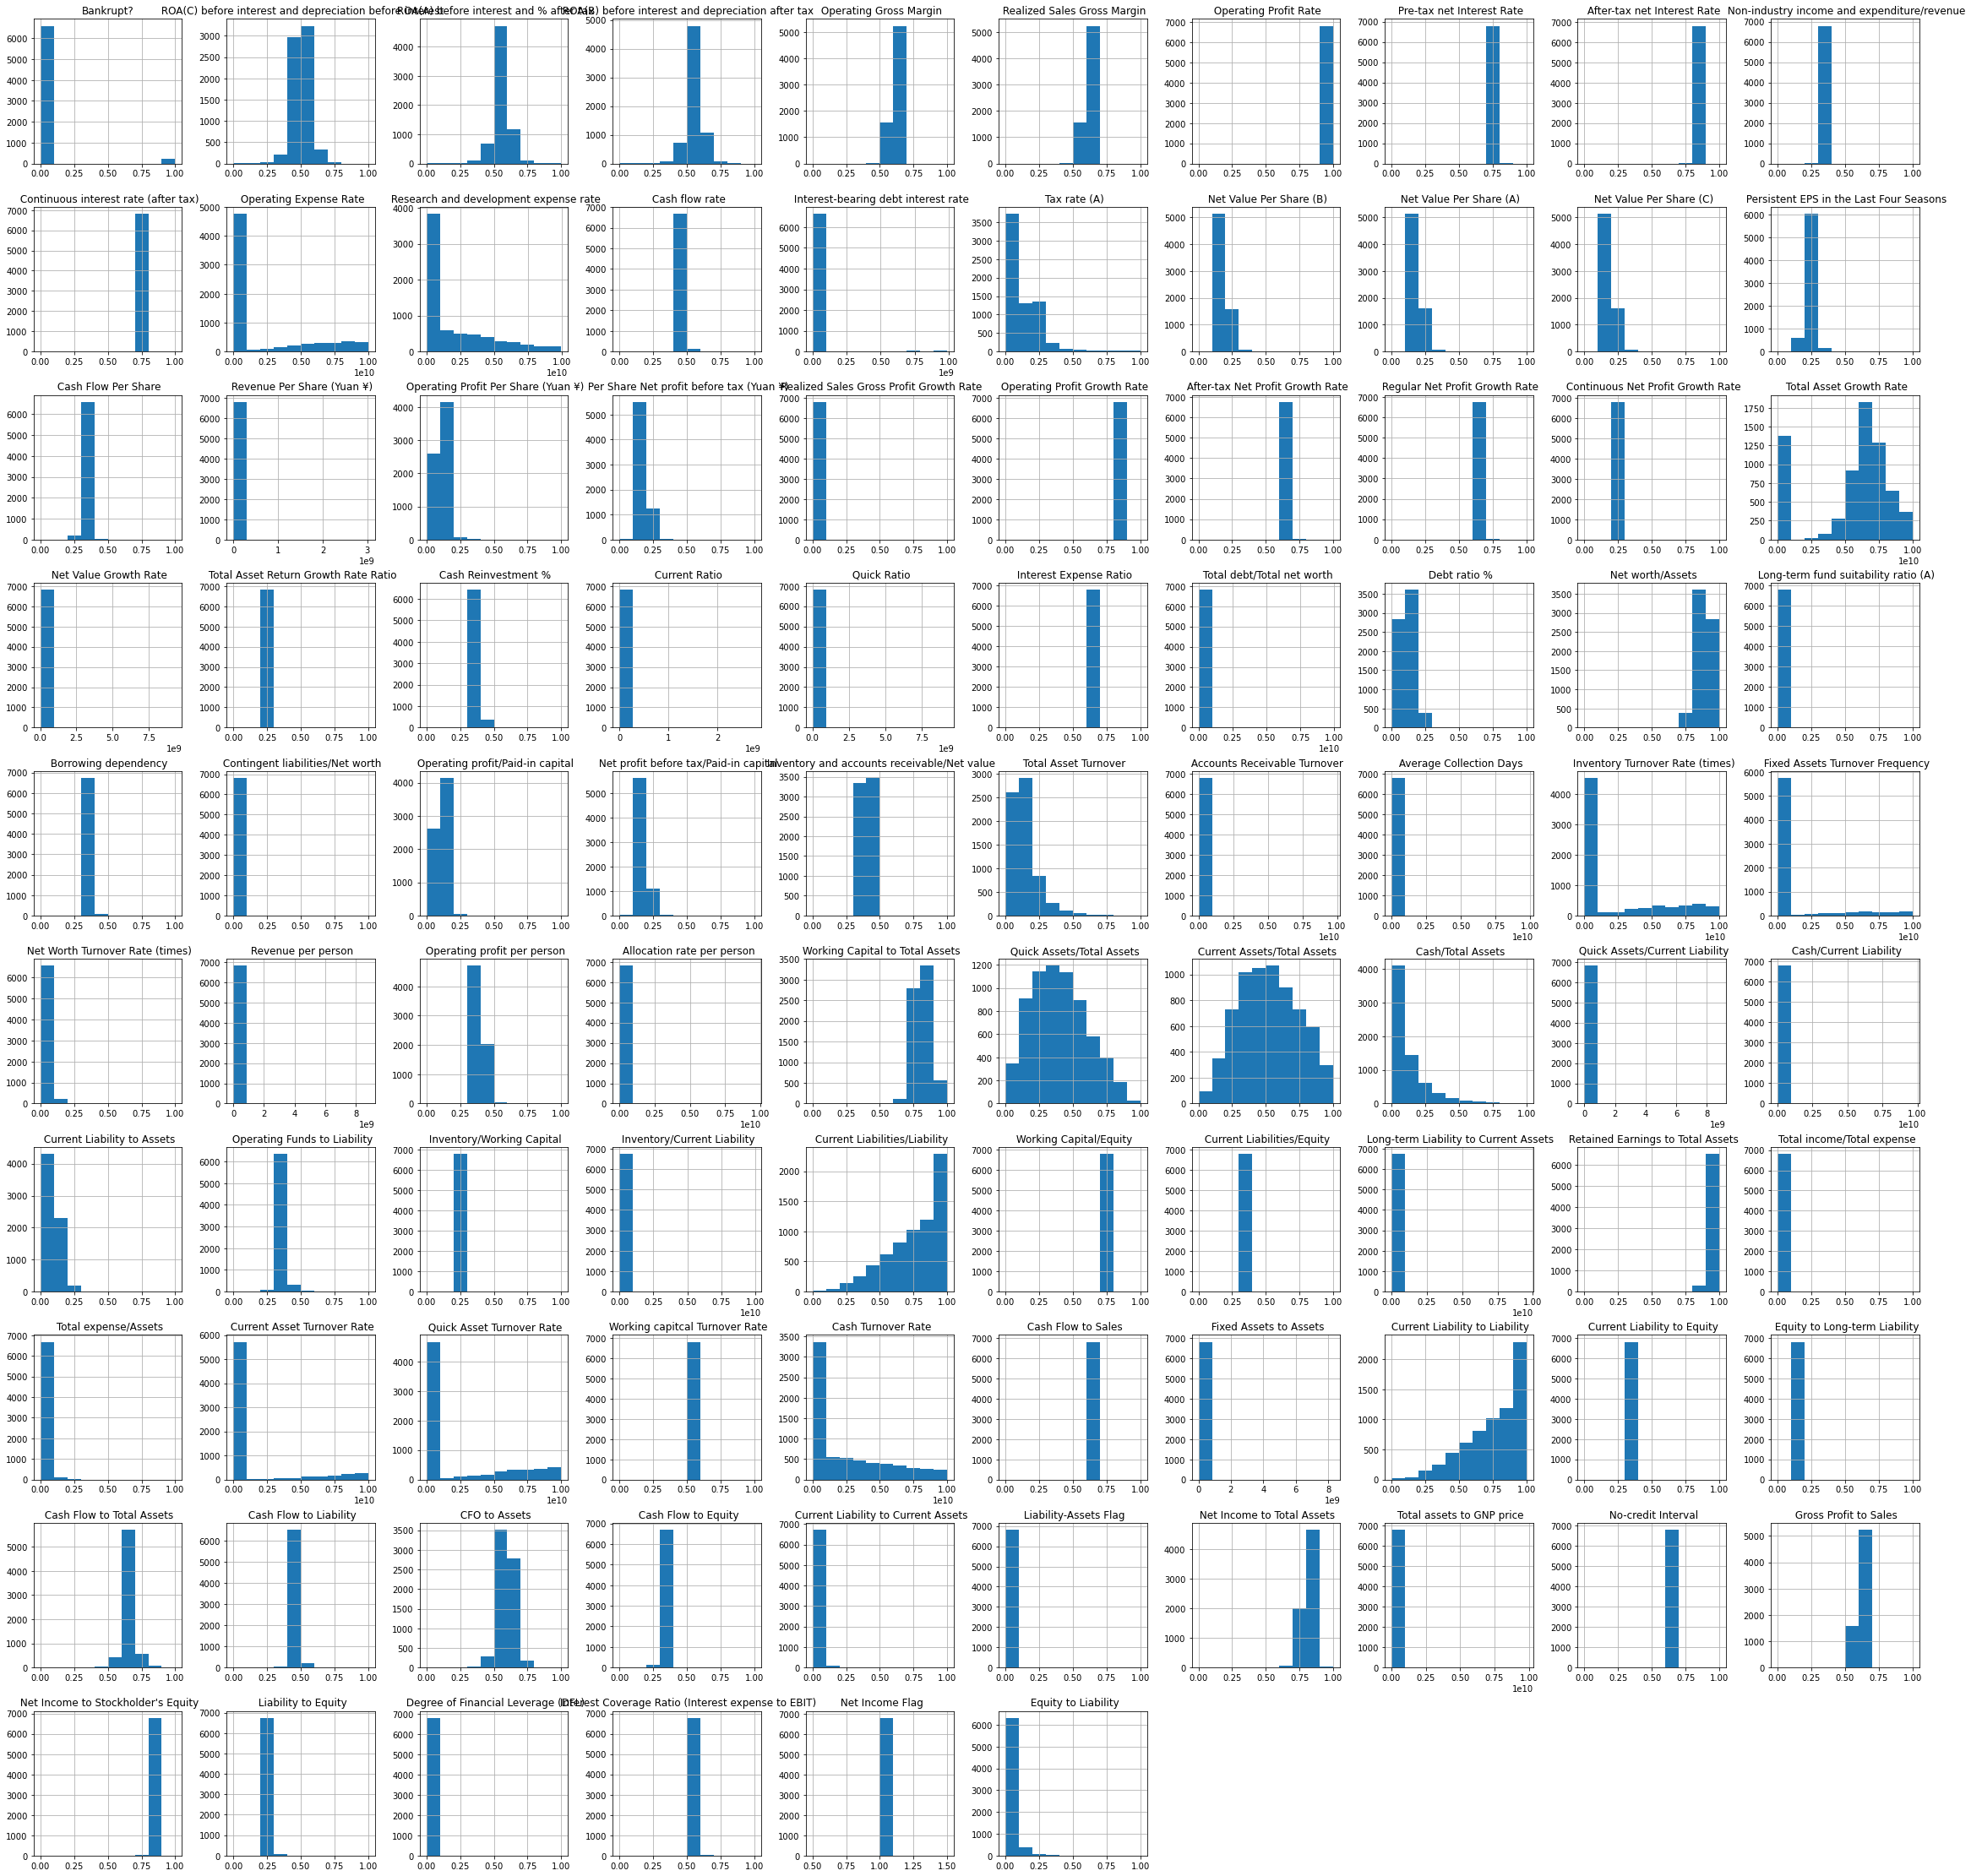

In [63]:
dataset.hist(figsize = (40,40))
# see the distribution of all the features

<AxesSubplot:>

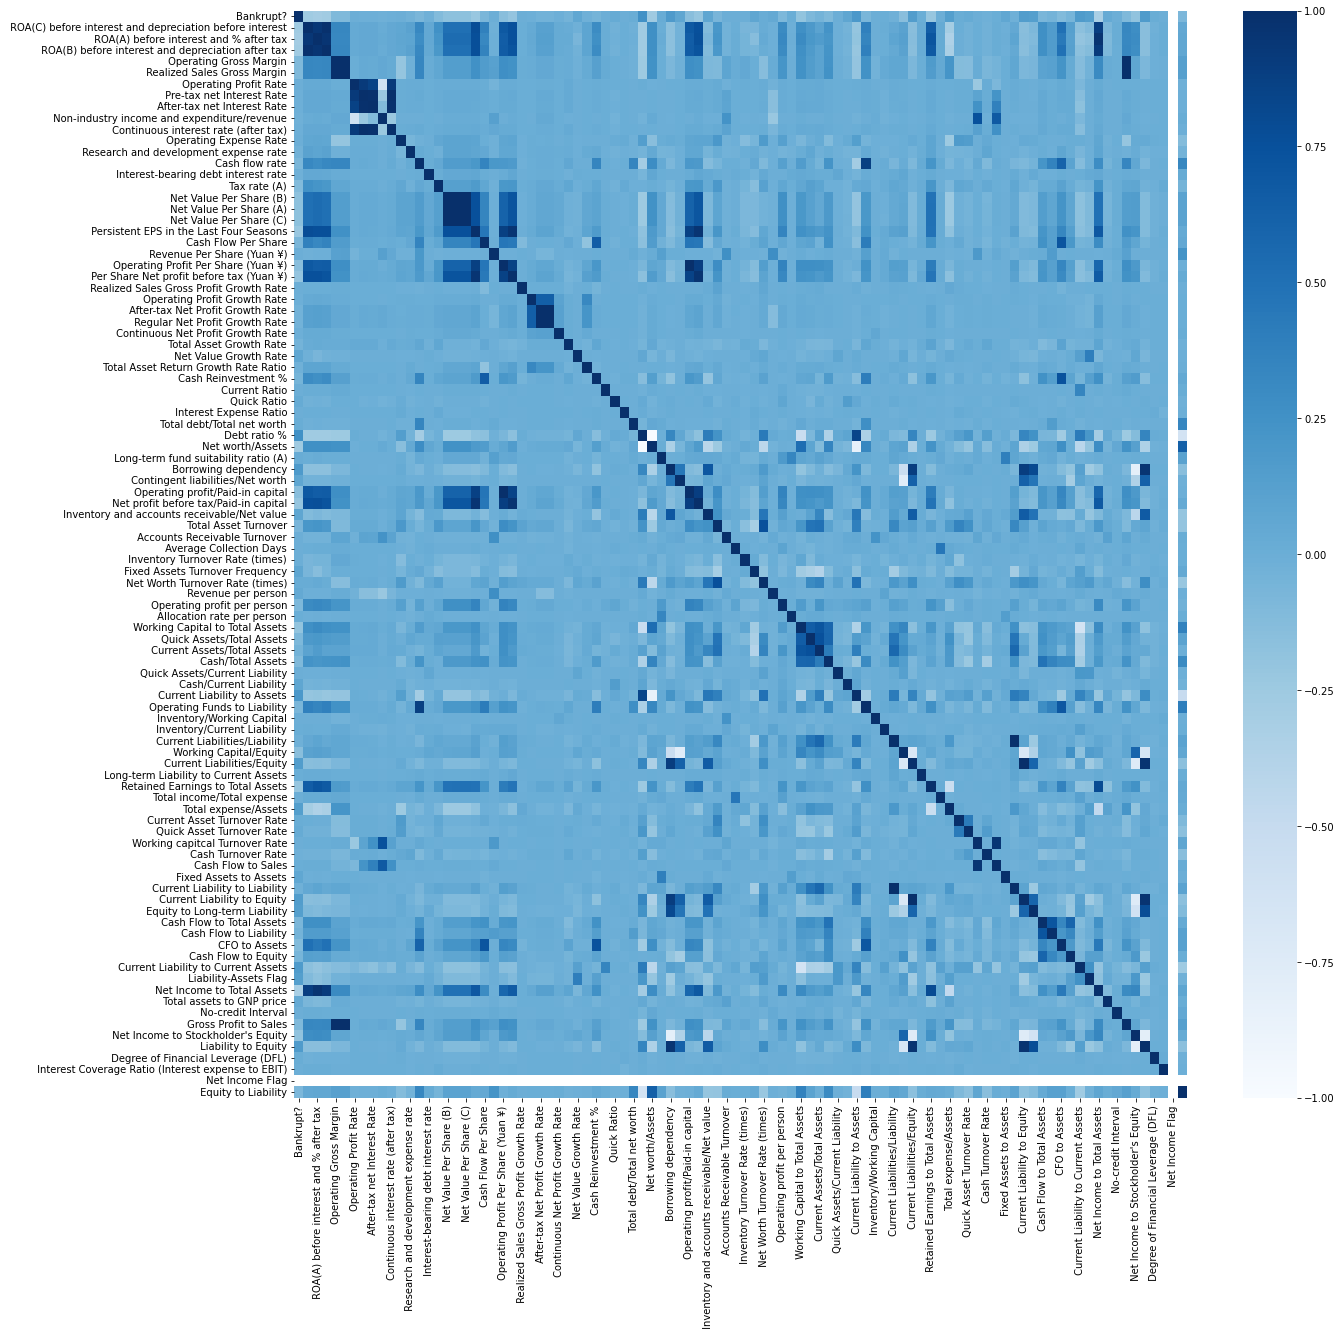

In [64]:
# construct correlation matrix to observe the strengh of relationships of each variable with bankruptcy
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), cmap = "Blues")

Text(0.5, 1.0, 'Relationship between bankrupt events and Net income to total assets')

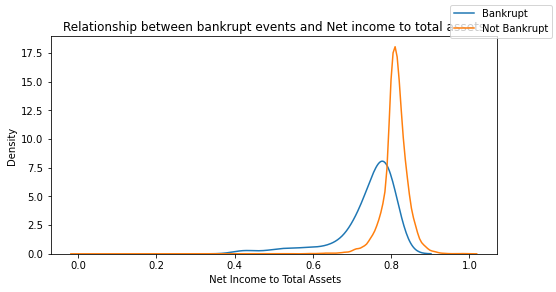

In [65]:
# construct density plot to observe relationship of interested variable with bankruptcy
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Net Income to Total Assets'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Net Income to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')

Text(0.5, 1.0, 'Relationship between bankrupt events and Total Asset Growth Rate')

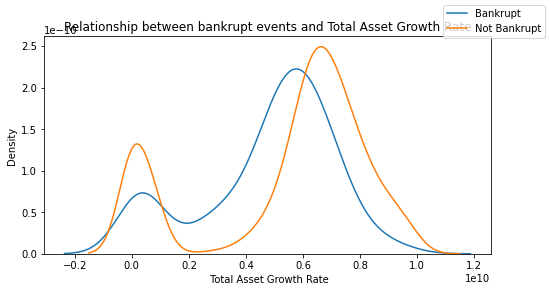

In [66]:
# Text Relationship between bankrupt events and Total Asset Growth Rate
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Total Asset Growth Rate'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Total Asset Growth Rate'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Asset Growth Rate')

## Logistic Regression

In [54]:
# Running baseline model
# No features dropped
# SMOTE applied in both train and validation sets

In [67]:
X_trainset = trainset.drop(['Bankrupt?', 'Unnamed: 0'], axis=1)
y_trainset = trainset['Bankrupt?']

In [68]:
X_validationset = validationset.drop(['Bankrupt?', 'Unnamed: 0'], axis=1)
y_validationset = validationset['Bankrupt?']

In [69]:
X_testset = testset.drop(['Bankrupt?', 'Unnamed: 0'], axis=1)
y_testset = testset['Bankrupt?']

In [70]:
preprocessor = StandardScaler()

X_trainset = preprocessor.fit_transform(X_trainset)
X_validationset = preprocessor.transform(X_validationset)

In [71]:
y_trainset.value_counts()/len(y_trainset)

0    0.969936
1    0.030064
Name: Bankrupt?, dtype: float64

In [72]:
sm = SMOTE(k_neighbors=3)

X_trainset_SMOTE, y_trainset_SMOTE = sm.fit_resample(X_trainset, y_trainset)
X_validationset_SMOTE, y_validationset_SMOTE = sm.fit_resample(X_validationset, y_validationset)

In [73]:
y_trainset_SMOTE.value_counts()/len(y_trainset_SMOTE)

0    0.5
1    0.5
Name: Bankrupt?, dtype: float64

In [74]:
y_validationset_SMOTE.value_counts()/len(y_validationset_SMOTE)

0    0.5
1    0.5
Name: Bankrupt?, dtype: float64

In [75]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_trainset_SMOTE, y_trainset_SMOTE)

LogisticRegression(max_iter=1000)

In [160]:
pred_train_SMOTE = model.predict(X_train_SMOTE)
pred_validation_SMOTE = model.predict(X_validation_SMOTE)
print(classification_report(y_train_SMOTE, pred_train_SMOTE))
print(classification_report(y_validation_SMOTE, pred_validation_SMOTE))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3323
           1       0.90      0.93      0.92      3323

    accuracy                           0.92      6646
   macro avg       0.92      0.92      0.92      6646
weighted avg       0.92      0.92      0.92      6646

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1106
           1       0.85      0.72      0.78      1106

    accuracy                           0.80      2212
   macro avg       0.80      0.80      0.79      2212
weighted avg       0.80      0.80      0.79      2212



<AxesSubplot:>

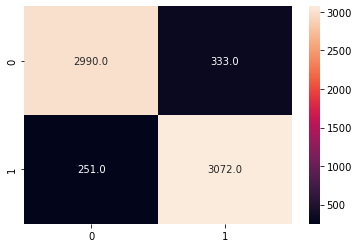

In [35]:
# cm for the train set
cm = confusion_matrix(y_trainset_SMOTE, model.predict(X_trainset_SMOTE))
sns.heatmap(cm, annot=True, fmt=".1f")

<AxesSubplot:>

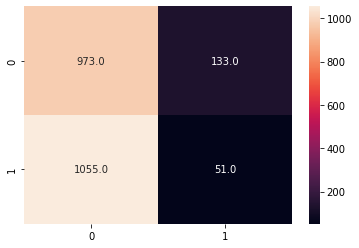

In [36]:
# cm for the validation set
cm = confusion_matrix(y_validationset_SMOTE, model.predict(X_validationset_SMOTE))
sns.heatmap(cm, annot=True, fmt=".1f")

In [37]:
preprocessor = StandardScaler()

X_validationset_SMOTE = preprocessor.fit_transform(X_validationset_SMOTE)
X_testset = preprocessor.transform(X_testset)

C:\Users\NIDHAL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [38]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_validationset_SMOTE, y_validationset_SMOTE)

LogisticRegression(max_iter=1000)

In [40]:
pred_validationset_SMOTE = model.predict(X_validationset_SMOTE)
pred_testset = model.predict(X_testset)
print(classification_report(y_validationset_SMOTE, pred_validationset_SMOTE))
print(classification_report(y_testset, pred_testset))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1106
           1       0.95      0.99      0.97      1106

    accuracy                           0.97      2212
   macro avg       0.97      0.97      0.97      2212
weighted avg       0.97      0.97      0.97      2212

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2170
           1       0.23      0.58      0.33        81

    accuracy                           0.91      2251
   macro avg       0.61      0.75      0.64      2251
weighted avg       0.96      0.91      0.93      2251



In [41]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score

In [42]:
f1_score(y_testset, pred_testset, average='macro')

0.6408686415283065

In [43]:
fbeta_score(y_testset, pred_testset, average='macro', beta=0.5)

0.6155830464141778

In [44]:
fbeta_score(y_testset, pred_testset, average='macro', beta=2)

0.690462681972116

## KNN

In [45]:
from sklearn.model_selection import GridSearchCV

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_validationset_SMOTE,y_validationset_SMOTE)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [227]:
knn = KNeighborsClassifier(n_neighbors=4, leaf_size = 1, p = 2)
knn.fit(X_validation_SMOTE, y_validation_SMOTE)

KNeighborsClassifier(leaf_size=1, n_neighbors=4)

In [ ]:
pred_validationset_SMOTE = model.predict(X_validationset_SMOTE)
pred_testset = knn.predict(X_testset)
print(classification_report(y_validationset_SMOTE, pred_validationset_SMOTE))
print(classification_report(y_testset, pred_testset))

In [229]:
f1_score(y_testset, pred_testset, average='macro')

0.5893469802388208

In [230]:
fbeta_score(y_testset, pred_testset, average='macro', beta=0.5)

0.6423199591451312

In [231]:
fbeta_score(y_testset, pred_testset, average='macro', beta=2)

0.5666867581393039

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, min_samples_split = 10, max_depth = 3)
rf.fit(X_validationset_SMOTE,y_validationset_SMOTE)

RandomForestClassifier(max_depth=3, min_samples_split=10, n_estimators=300)

In [79]:
pred_validationset_SMOTE = rf.predict(X_validationset_SMOTE)
pred_testset = rf.predict(X_testset)
print(classification_report(y_validationset_SMOTE, pred_validationset_SMOTE))
print(classification_report(y_testset, pred_testset))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1106
           1       0.88      0.98      0.93      1106

    accuracy                           0.92      2212
   macro avg       0.93      0.92      0.92      2212
weighted avg       0.93      0.92      0.92      2212

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2170
           1       0.00      0.00      0.00        81

    accuracy                           0.96      2251
   macro avg       0.48      0.50      0.49      2251
weighted avg       0.93      0.96      0.95      2251



C:\Users\NIDHAL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\NIDHAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIDHAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIDHAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predic

In [80]:
f1_score(y_testset, pred_testset, average='macro')

0.49083917665686494

In [81]:
fbeta_score(y_testset, pred_testset, average='macro', beta=0.5)

0.4855020583497405

In [82]:
fbeta_score(y_testset, pred_testset, average='macro', beta=2)

0.4962949409935047

## SVM

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()
svc.fit(X_trainset_SMOTE, y_trainset_SMOTE)
 
# print prediction results
pred_trainset_SMOTE = svc.predict(X_trainset_SMOTE)
pred_validationset_SMOTE = rf.predict(X_validationset_SMOTE)
print(classification_report(y_trainset_SMOTE, pred_trainset_SMOTE))
print(classification_report(y_validationset_SMOTE, pred_validationset_SMOTE))

NameError: name 'rf' is not defined

In [257]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid2 = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
 
grid = GridSearchCV(SVC(), param_grid2, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_validationset_SMOTE, y_validationset_SMOTE)

print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [253]:
svc = SVC(C=10, gamma=0.001, kernel='rbf')
svc.fit(X_validationset_SMOTE, y_validationset_SMOTE)
 
# print prediction results
pred_validationset_SMOTE = svc.predict(X_validation_SMOTE)
pred_testset = rf.predict(X_testset)
print(classification_report(y_validationset_SMOTE, pred_validationset_SMOTE))
print(classification_report(y_testset, pred_testset))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2491
           1       0.93      0.17      0.28        78

    accuracy                           0.97      2569
   macro avg       0.95      0.58      0.63      2569
weighted avg       0.97      0.97      0.97      2569

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       832
           1       1.00      0.04      0.08        25

    accuracy                           0.97       857
   macro avg       0.99      0.52      0.53       857
weighted avg       0.97      0.97      0.96       857



In [254]:
f1_score(y_testset, pred_testset, average='macro')

0.5313525337222019

In [255]:
fbeta_score(y_testset, pred_testset, average='macro', beta=0.5)

0.5749287010630023

In [256]:
fbeta_score(y_testset, pred_testset, average='macro', beta=2)

0.5218844064138727